In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv("DataSet.csv")
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


In [ ]:
# Display column names
print("Column Names:")
print(df.columns.tolist())

# Display dataset info
print("\nDataset Info:")
df.info()

# Show number of missing values per column
print("\nMissing Values:")
print(df.isnull().sum())


Column Names:
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent', 'in_balanced_dataset']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     1788

In [ ]:
# Fill NaNs in text fields with empty strings (as in the reference notebook)
df['company_profile'] = df['company_profile'].fillna('')
df['description'] = df['description'].fillna('')
df['requirements'] = df['requirements'].fillna('')
df['benefits'] = df['benefits'].fillna('')


In [ ]:
df.isna().sum()

,0
title,0
location,346
department,11547
salary_range,15012
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0
has_company_logo,0


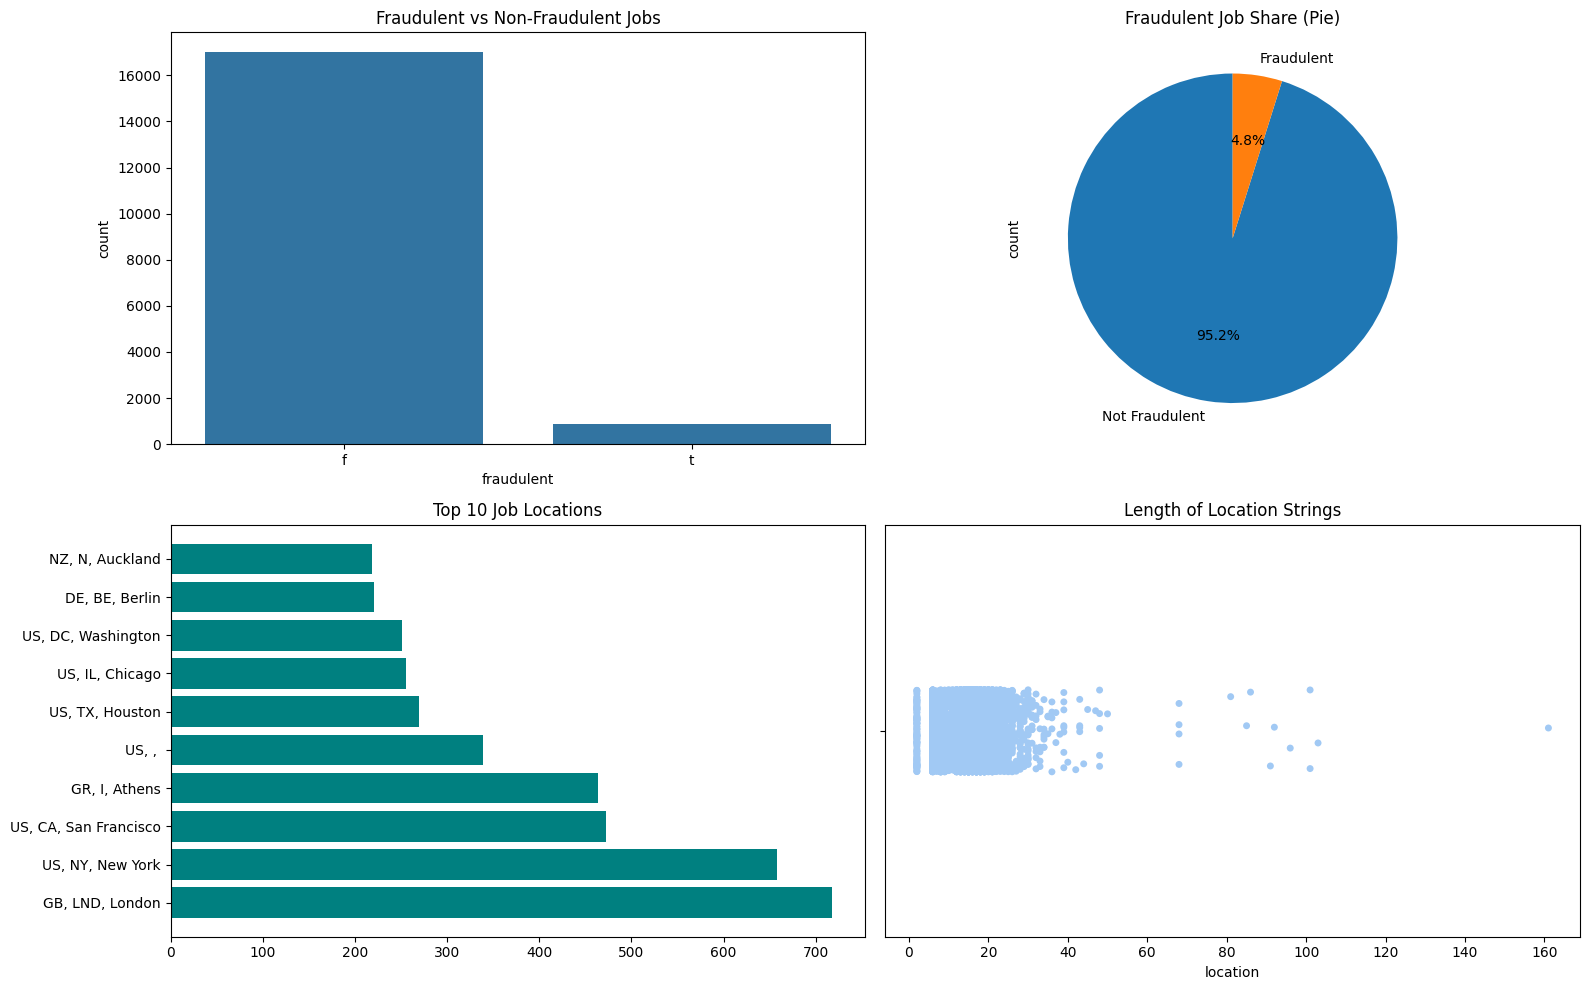

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 1. Class distribution (fraudulent vs non-fraudulent)
sns.countplot(x='fraudulent', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Fraudulent vs Non-Fraudulent Jobs')

# 2. Pie chart of class distribution
df['fraudulent'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, labels=['Not Fraudulent', 'Fraudulent'], ax=axs[0, 1])
axs[0, 1].set_title('Fraudulent Job Share (Pie)')

# 3. Top 10 locations (horizontal bar)
top_locations = df['location'].value_counts().head(10)
axs[1, 0].barh(top_locations.index, top_locations.values, color='teal')
axs[1, 0].set_title('Top 10 Job Locations')

# 4. Location length distribution (stripplot)
sns.stripplot(data=df, x=df['location'].str.len(), ax=axs[1, 1], jitter=True, palette='pastel')
axs[1, 1].set_title('Length of Location Strings')

plt.tight_layout()


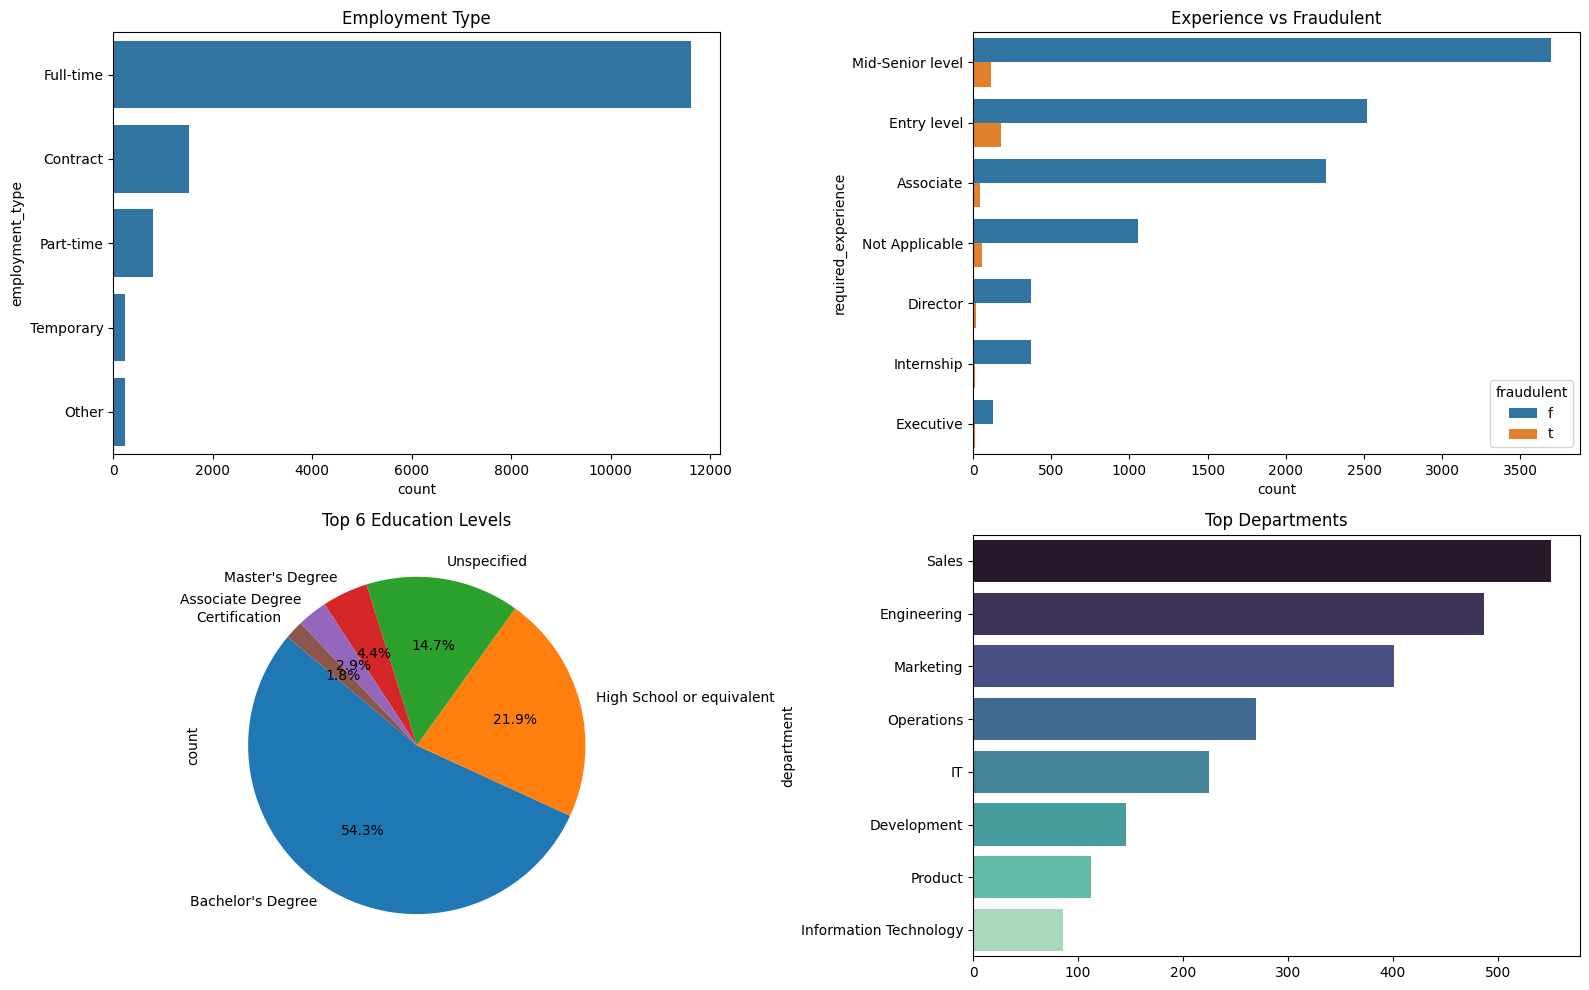

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 1. Employment Type (countplot)
sns.countplot(y='employment_type', data=df, order=df['employment_type'].value_counts().index, ax=axs[0, 0])
axs[0, 0].set_title('Employment Type')

# 2. Required Experience (grouped countplot)
sns.countplot(y='required_experience', hue='fraudulent', data=df, order=df['required_experience'].value_counts().index, ax=axs[0, 1])
axs[0, 1].set_title('Experience vs Fraudulent')

# 3. Education Levels (pie chart)
df['required_education'].value_counts().head(6).plot.pie(
    autopct='%1.1f%%', startangle=140, ax=axs[1, 0])
axs[1, 0].set_title('Top 6 Education Levels')

# 4. Department (barplot)
top_dept = df['department'].value_counts().head(8)
sns.barplot(x=top_dept.values, y=top_dept.index, ax=axs[1, 1], palette='mako')
axs[1, 1].set_title('Top Departments')

plt.tight_layout()


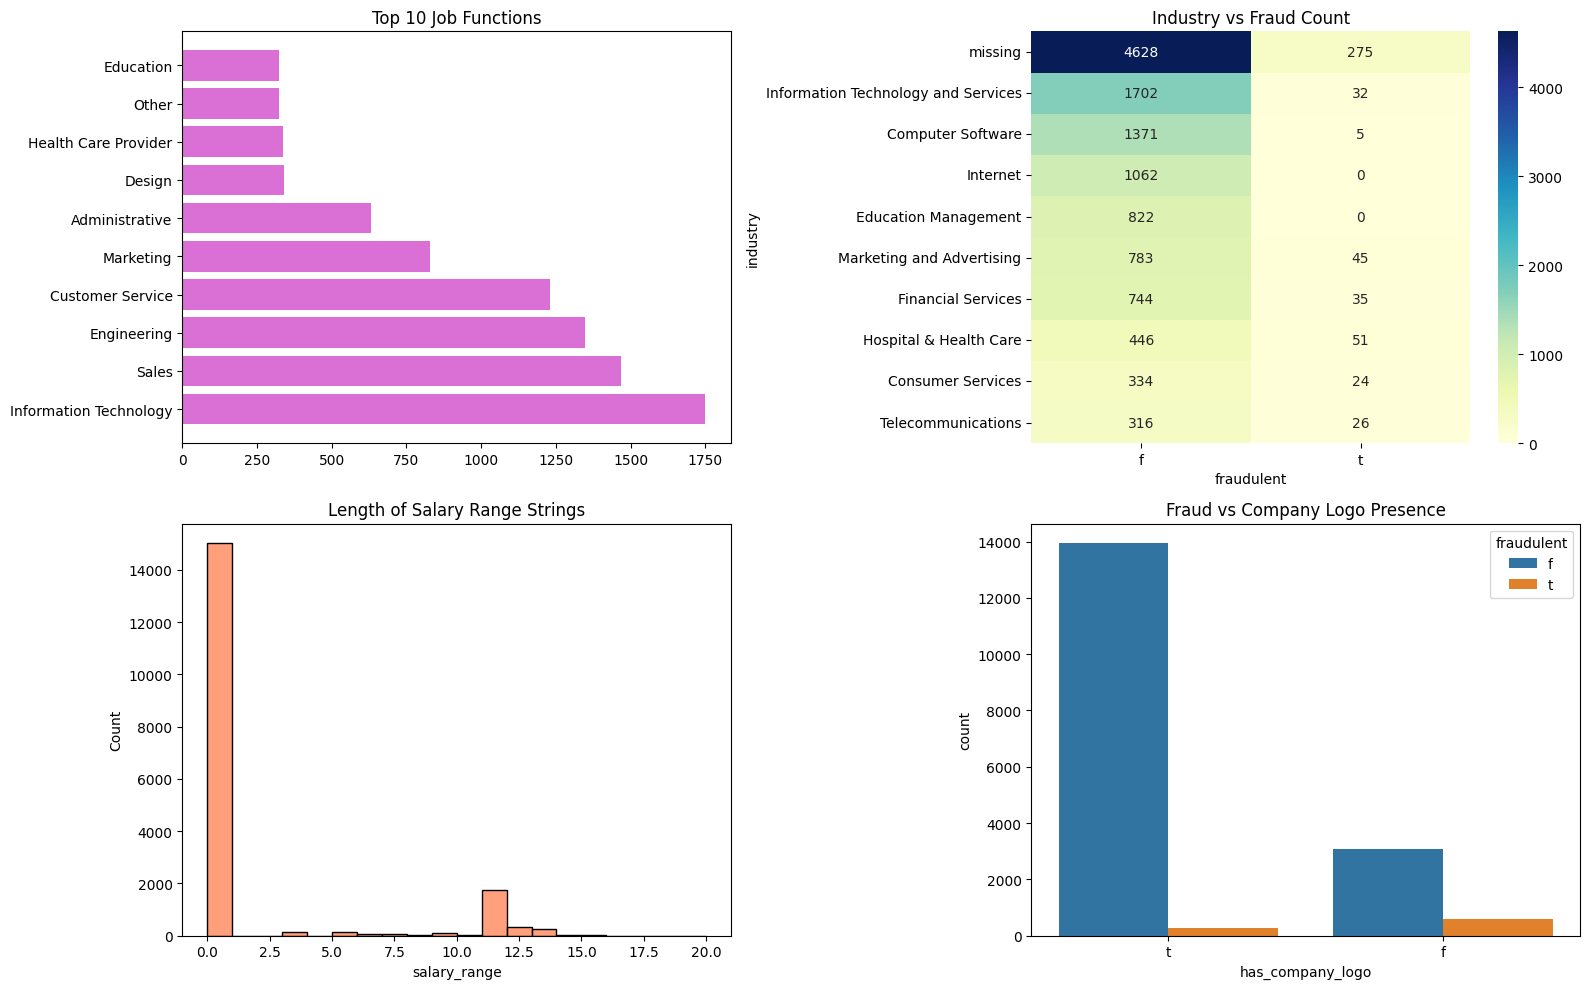

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 1. Function distribution (horizontal bar)
top_funcs = df['function'].value_counts().head(10)
axs[0, 0].barh(top_funcs.index, top_funcs.values, color='orchid')
axs[0, 0].set_title('Top 10 Job Functions')

# 2. Industry distribution (heatmap of co-occurrence with fraud)
industry_crosstab = pd.crosstab(df['industry'].fillna('missing'), df['fraudulent'])
industry_crosstab = industry_crosstab[industry_crosstab.sum(axis=1) > 50].sort_values(by='f', ascending=False).head(10)
sns.heatmap(industry_crosstab, annot=True, fmt='d', cmap='YlGnBu', ax=axs[0, 1])
axs[0, 1].set_title('Industry vs Fraud Count')

# 3. Salary range (length distribution)
salary_len = df['salary_range'].fillna('').apply(len)
sns.histplot(salary_len, bins=20, ax=axs[1, 0], color='coral')
axs[1, 0].set_title('Length of Salary Range Strings')

# 4. Has company logo (countplot)
sns.countplot(x='has_company_logo', hue='fraudulent', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Fraud vs Company Logo Presence')

plt.tight_layout()


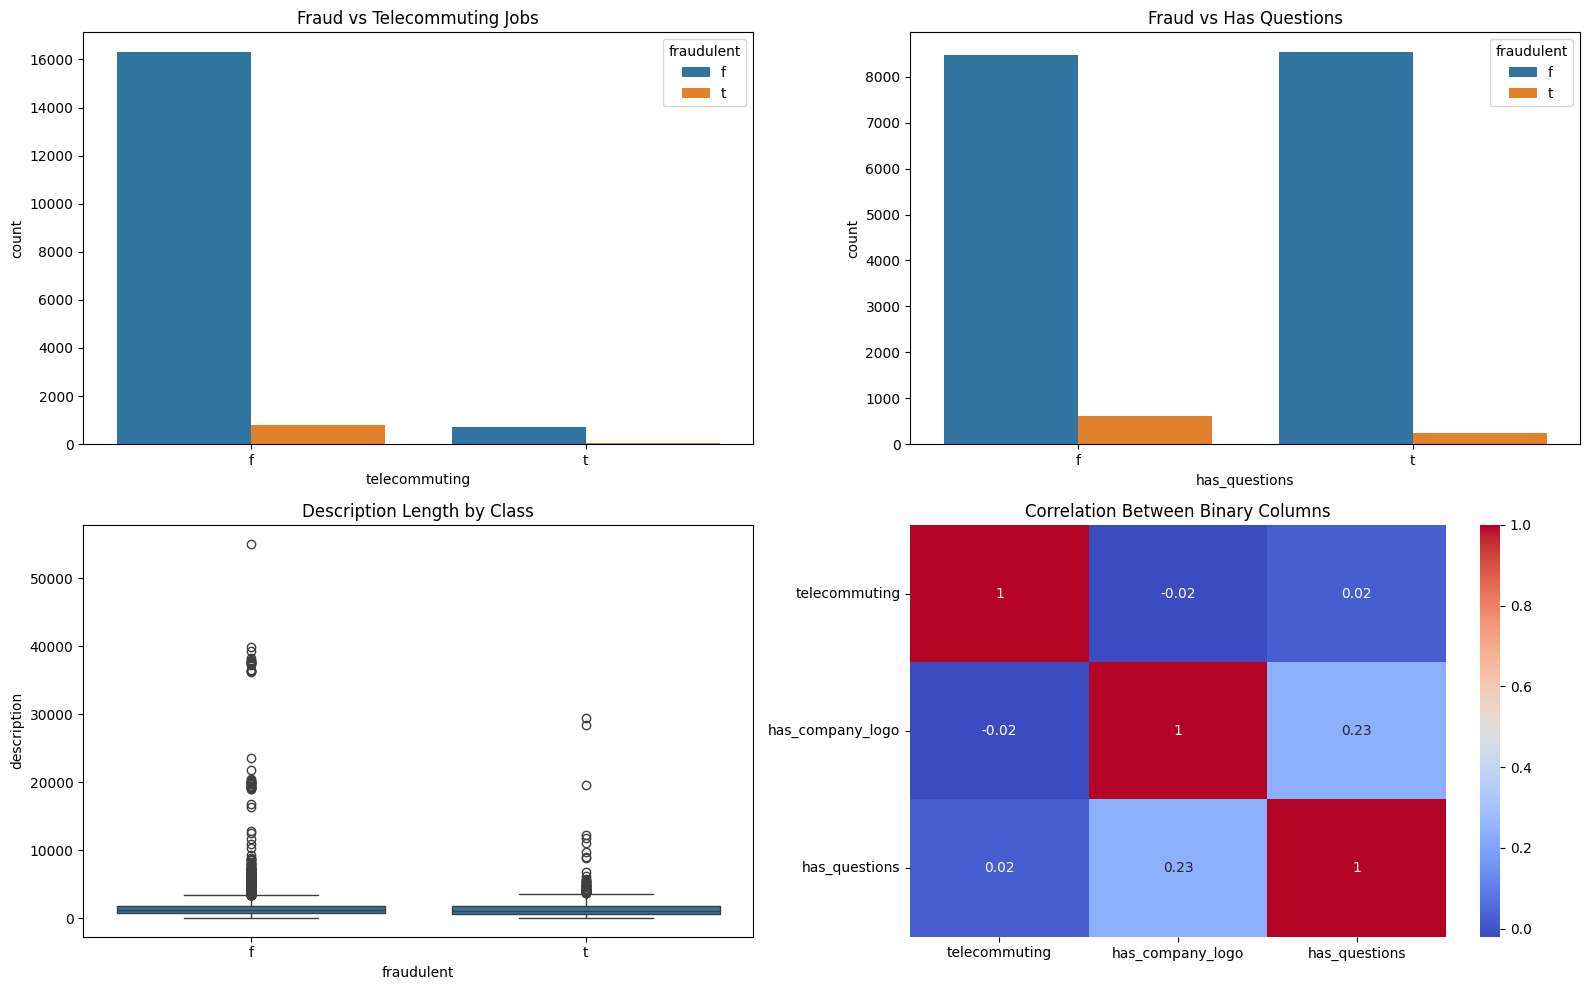

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 1. Telecommuting vs fraud
sns.countplot(x='telecommuting', hue='fraudulent', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Fraud vs Telecommuting Jobs')

# 2. Has questions vs fraud
sns.countplot(x='has_questions', hue='fraudulent', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Fraud vs Has Questions')

# 3. Description length distribution
desc_len = df['description'].apply(lambda x: len(str(x)))
sns.boxplot(x='fraudulent', y=desc_len, data=df, ax=axs[1, 0])
axs[1, 0].set_title('Description Length by Class')

# 4. Correlation heatmap of binary flags
binary_cols = ['telecommuting', 'has_company_logo', 'has_questions']
binary_df = df[binary_cols].replace({'t': 1, 'f': 0})
corr = binary_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Correlation Between Binary Columns')

plt.tight_layout()


In [ ]:
# Merge text-based columns into a single 'full_text' column
df['full_text'] = (
    df['title'].fillna('').map(str) + ' ' +
    df['company_profile'].fillna('').map(str) + ' ' +
    df['description'].fillna('').map(str) + ' ' +
    df['requirements'].fillna('').map(str) + ' ' +
    df['benefits'].fillna('').map(str)
)


df[['full_text']].head()

,full_text
0,"Marketing Intern <h3>We're Food52, and we've c..."
1,Customer Service - Cloud Video Production <h3>...
2,Commissioning Machinery Assistant (CMA) <h3></...
3,Account Executive - Washington DC <p>Our passi...
4,Bill Review Manager <p>SpotSource Solutions LL...


In [ ]:
# Drop original text columns that were merged into 'full_text'
df = df.drop(['title', 'company_profile', 'description', 'requirements', 'benefits'], axis=1)

print(df.columns)

Index(['location', 'department', 'salary_range', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset', 'full_text'],
      dtype='object')


In [ ]:
df.head()

,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,full_text
0,"US, NY, New York",Marketing,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f,"Marketing Intern <h3>We're Food52, and we've c..."
1,"NZ, , Auckland",Success,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f,Customer Service - Cloud Video Production <h3>...
2,"US, IA, Wever",NaN,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f,Commissioning Machinery Assistant (CMA) <h3></...
3,"US, DC, Washington",Sales,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f,Account Executive - Washington DC <p>Our passi...
4,"US, FL, Fort Worth",NaN,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f,Bill Review Manager <p>SpotSource Solutions LL...


In [ ]:
df = df[['full_text', 'fraudulent']].dropna()
df.head()

,full_text,fraudulent
0,"Marketing Intern <h3>We're Food52, and we've c...",f
1,Customer Service - Cloud Video Production <h3>...,f
2,Commissioning Machinery Assistant (CMA) <h3></...,f
3,Account Executive - Washington DC <p>Our passi...,f
4,Bill Review Manager <p>SpotSource Solutions LL...,f


In [ ]:
def remove_number_from_text(text):
    number_pattern = r'[0-9]'
    cleaned_text = re.sub(number_pattern, '', text)
    return cleaned_text

In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

# Unduh stopwords jika belum dilakukan
nltk.download('stopwords')

def clean_text(text):
    text = str(text)
    text = BeautifulSoup(text, "html.parser").get_text()  # Hapus HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Hapus karakter selain alfanumerik dan spasi
    text = text.lower()  # Ubah ke lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi ganda dan trim
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r"\n", "", text)  # Hapus newline
    text = re.sub(r"http\S+", "", text)  # Hapus URL valid

    # Hapus stopwords
    stop_words = set(stopwords.words('english'))  # Bisa disesuaikan dengan bahasa lain jika perlu
    text = ' '.join([word for word in text.split() if word not in stop_words])

    text = remove_number_from_text(text)  # Hapus angka yang tersisa
    return text

# Apply ke kolom full_text
df['full_text'] = df['full_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df["full_text"]
df.head()

,full_text,fraudulent
0,marketing intern food weve created groundbreak...,f
1,customer service cloud video production second...,f
2,commissioning machinery assistant cma valor se...,f
3,account executive washington dc passion improv...,f
4,bill review manager spotsource solutions llc g...,f


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the final preprocessed dataset to CSV in Google Drive
file_path = "/content/drive/MyDrive/ready_fraud_detection_dataset_new.csv"  # Replace with your Google Drive folder path
df.to_csv(file_path, index=False)

print(f"✅ Dataset saved as '{file_path}'")


Mounted at /content/drive
✅ Dataset saved as '/content/drive/MyDrive/ready_fraud_detection_dataset_new.csv'


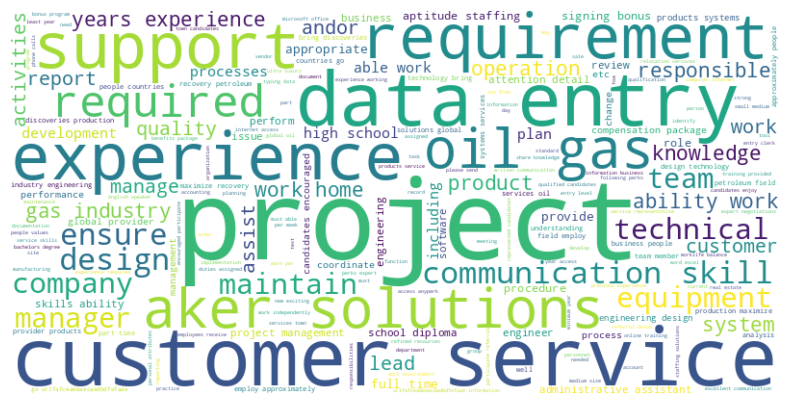

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ganti path ke file CSV Anda
csv_file_path = 'ready_fraud_detection_dataset_new.csv'

# Baca dataset CSV
df = pd.read_csv(csv_file_path)

# Misalkan kolom label yang berisi kelas fraud disebut 'label', ganti sesuai dengan nama kolom Anda
# Filter hanya baris dengan label fraud
fraud_text_data = ' '.join(df[df['fraudulent'] == 't']['full_text'].dropna())  # Gabungkan teks dari kelas fraud

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fraud_text_data)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.show()

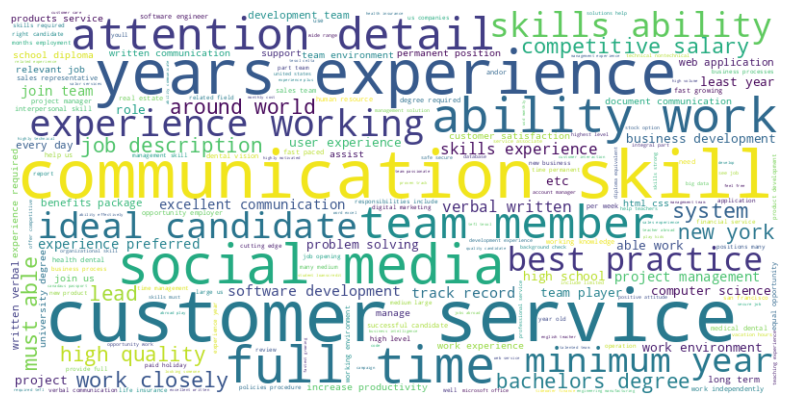

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ganti path ke file CSV Anda
csv_file_path = 'ready_fraud_detection_dataset_new.csv'

# Baca dataset CSV
df = pd.read_csv(csv_file_path)

# Misalkan kolom label yang berisi kelas fraud disebut 'label', ganti sesuai dengan nama kolom Anda
# Filter hanya baris dengan label non-fraud
non_fraud_text_data = ' '.join(df[df['fraudulent'] == 'f']['full_text'].dropna())  # Gabungkan teks dari kelas non-fraud

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_fraud_text_data)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.show()